##QED-CIS in the canonical RHF basis
The polaritonic energy eigenfunctions for state $I$ in the
CQED-CIS ansatz can be written as 
\begin{equation}
\Psi_I = c_0^0 |\Phi_0\rangle |0\rangle + 
c_0^1 |\Phi_0\rangle |1\rangle +
\sum_{i,a} c_{ia}^0 |\Phi_i^a\rangle |0\rangle +
\sum_{i,a} c_{ia}^1 |\Phi_i^a\rangle |1\rangle. 
\end{equation}
We can build and diagonalize a Hamiltonian matrix in this basis to 
determine the CIS energies and wavefunctions.  In so doing, we arrive at the following classes of matrix elements (where all dipole, quadrupole, and other 1- and 2-electron integrals are now transformed to the Canonincal RHF basis):
\begin{align}
    \langle s | \langle \Phi_0 | \hat{H} | \Phi_0 \rangle | t \rangle &= 
    E_{RHF} + \sqrt{t} \left(\omega - i \frac{\gamma}{2} \right)\delta_{st} \\
    &+ \delta_{st}  \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ii}\mu^{\xi}_{jj} \\
    &- \frac{1}{2}\delta_{st} \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ij}\mu^{\xi}_{ji} \\
    &+ \delta_{st} \frac{1}{2}\sum_{\xi,\xi'} \sum_i^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ii} \\
    &+ \delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii} \\
    &+ \delta_{st} d_c \\
    &+\sqrt{\frac{\omega}{2}} \lambda \cdot \langle \mu \rangle ( \delta_{s,t+1} + \delta_{s+1,t} ) \\
    &-\sqrt{\frac{\omega}{2}} \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii}( \delta_{s,t+1} + \delta_{s+1,t} )
\end{align}
for terms involving the Hartree-Fock reference states and arbitrary photon states,
\begin{align}
    \langle s \langle \Phi_0 | \hat{H} | \Phi_i^a \rangle | t \rangle &=
    \delta_{st} \sum_{\xi,\xi'}\sum_{j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu_{ia}^{\xi} \mu_{jj}^{\xi'} \\
    &-\delta_{st} \frac{1}{2}\sum_{\xi,\xi'}\sum_{j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu_{ij}^{\xi} \mu_{ja}^{\xi'} \\
    &+ \delta_{st} \frac{1}{2}\sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} Q_{ia}^{\xi} \\
    &+ \delta_{st} \left( \lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \lambda^{\xi} \mu_{ia}^{\xi} \\
    &- \sqrt{\frac{\omega}{2}} \sum_{\xi} \lambda^{\xi} \mu^{\xi}_{ia}(\delta_{s,t+1} + \delta_{s+1,t}),
\end{align}
for elements between the Hartree-Fock reference and singly-excited determinants and arbitrary photon states, and
\begin{align}
    \langle s \langle \Phi_i^a | \hat{H} | \Phi_j^b \rangle | t \rangle &=   \left(\epsilon_a - \epsilon_i \right)\delta_{ij} \delta_{ab} \delta_{st} \\
    &+ \delta_{st} \left( 2(ia|jb) - (ij|ab) \right) \\
    &+ \delta_{st} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ia} \mu^{\xi}_{jb} \\
    &- \delta_{st} \frac{1}{2} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ij} \mu^{\xi}_{ab} \\
    &+ \delta_{st} \frac{1}{2} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ab} \delta_{ij} \\
    &- \delta_{st} \frac{1}{2} \sum_{\xi,\xi'} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ij} \delta_{ab} \\
    &+ \delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \lambda^{\xi} \mu^{\xi}_{ab} \delta_{ij} \\
    &-\delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \lambda^{\xi} \mu^{\xi}_{ij} \delta_{ab} \\
    &+ \delta_{st} \delta_{ij} \delta_{ab} d_c \\
    &+ \left( \delta_{s,t+1} + \delta_{s+1,t} \right) \delta_{ij} \delta_{ab} \sqrt{\frac{\omega}{2}} \lambda \cdot \langle \mu \rangle \\
    &- \left( \delta_{s,t+1} + \delta_{s+1,t} \right) \sqrt{\frac{\omega}{2}} \sum_{xi} \lambda^{\xi} \mu^{\xi}_{ab} \delta_{ij} \\
    &+ \left( \delta_{s,t+1} + \delta_{s+1,t} \right) \sqrt{\frac{\omega}{2}} \sum_{xi} \lambda^{\xi} \mu^{\xi}_{ij} \delta_{ab}
\end{align}

In [1]:
# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
import scipy.linalg as la
import time
from helper_cqed_cis import *

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


options_dict = {'basis':        'sto-3g',
                  'scf_type':     'pk',
                  'reference':    'rhf',
                  'save_jk': True}

# MgH+ string
mol_string = """Mg
H 1 1.3
symmetry c1
1 1
"""


# electric field
Ex = 0
Ey = 0
Ez = 0
lam = np.array([Ex, Ey, Ez])
omega_val = 7.0 / 27.211

# run cqed_rhf and capture the results!
rhf_e, cqed_cis_e_array, cqed_vecs = cqed_cis(lam, mol_string, options_dict, omega_val, include_dse=False)
print("Psi4 SCF Energy:", rhf_e)
print("Array of CQED_CIS Energy Eigenvalues:")
print(cqed_cis_e_array)


Number of occupied orbitals: 6
Psi4 SCF Energy: -197.49010982791265
Array of CQED_CIS Energy Eigenvalues:
[-197.49010983 -197.23286092    0.34494287    0.34494287    0.4993679
    0.4993679     0.4993679     0.4993679     0.94623095    0.94623095
    1.89519808    1.89519808    1.89519808    1.89519808    1.92005253
    1.92005253    2.07714375    2.07714375    2.0778852     2.0778852
    2.0778852     2.0778852     2.08179912    2.08179912    2.08179912
    2.08179912    2.30172525    2.30172525    2.58261007    2.58261007
    2.58261007    2.58261007    2.69007716    2.69007716    3.49832467
    3.49832467    3.66363737    3.66363737    3.66363737    3.66363737
    4.16793991    4.16793991   48.28139514   48.28139514   48.44228124
   48.44228124   48.44228124   48.44228124   48.97945541   48.97945541]


Cells below can be tailored to automate running the above function... need to work on!

In [2]:
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
# electric field
Ex = 0
Ey = 0
Ez = 1e-3
lam = np.array([Ex, Ey, Ez])

#om = 4.3 / 27.211
om = 0.27
mol = psi4.geometry("""
1 1
Mg
H 1 1.3
symmetry c1
""")

e, wfn = psi4.energy("scf/sto-3g", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies and save them to a dictionary called 'res'
res = tdscf_excitations(wfn, states=2, tda=True, triplets = "NONE")
#rpa = tdscf_excitations(wfn, states=4, tda=True)
    
delta_e = [r["EXCITATION ENERGY"] for r in res]

print("om")
print(om)
print("lam")
print(lam)
rhf_e, cqed_cis_e_array, cqed_vecs = cqed_cis(lam, mol_string, options_dict, omega_val, include_dse=False)

print("psi4")
print(e, delta_e[0] + e, delta_e[1]+e)

print("me")
print(cqed_cis_e_array[0],cqed_cis_e_array[1],cqed_cis_e_array[2]+e)

om
0.27
lam
[0.    0.    0.001]

Number of occupied orbitals: 6
psi4
-197.49010982791265 -197.1451669582867 -196.99074192461876
me
-197.49011083231662 -197.23285991732803 -197.14635107639367


In [3]:
Ex = 0
Ey = 0
Ez = 5e-2
lam = np.array([Ex, Ey, Ez])

n_states = 2

# set the number of bond lengths to compute the stretch along
n_geoms = 20

# initialize geometry list
geoms = []

# initialize energy list... note
# there will be the ground state energy + n_states excited state energies
Psi4_g = []
Psi4_e = []
g0 = []
g1 = []
e0 = []
e1 = []
nodse_g0 = []
nodse_g1 = []
nodse_e0 = []
nodse_e1 = []

# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.3 + i*0.1)

# loop over bond lengths
ctr = 0
for i in rs:
    # generate the MgH+ molecule using a z-matrix and set the Mg-H+ bond length
    mol_string = """
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """
    mol = psi4.geometry(mol_string)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })  
   
    # calculate and save the ground-state energy and wavefunction
    e, wfn = psi4.energy("scf/sto-3g", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies and save them to a dictionary called 'res'
    res = tdscf_excitations(wfn, tda=True, states=n_states, triplets = "NONE")
    
    # parse the excitation energies from the 'res' dictionary
    delta_e = [r["EXCITATION ENERGY"] for r in res]
    #print("delta E is",delta_e)
    
    # parse the transition dipole moment from the 'res' dictionary
    #mu = [r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"] for r in res]
    Psi4_g.append(e+om)
    Psi4_e.append(e+delta_e[0])
    
    rhf_e, cqed_cis_e_array, cqed_vecs = cqed_cis(lam, mol_string, options_dict, omega_val)
    rhf_e, cqed_cis_e_array_ndse, cqed_vecs_ndse = cqed_cis(lam, mol_string, options_dict, omega_val, include_dse=False)

    g0.append(cqed_cis_e_array[0])
    g1.append(cqed_cis_e_array[1])
    e0.append(cqed_cis_e_array[0]+cqed_cis_e_array[2])
    e1.append(cqed_cis_e_array[0]+cqed_cis_e_array[3])
    nodse_g0.append(cqed_cis_e_array_ndse[0])
    nodse_g1.append(cqed_cis_e_array_ndse[1])
    nodse_e0.append(cqed_cis_e_array_ndse[0]+cqed_cis_e_array_ndse[2])
    nodse_e1.append(cqed_cis_e_array_ndse[0]+cqed_cis_e_array_ndse[3])
    # increment the counter!
    ctr += 1
    


Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number of occupied orbitals: 6

Number 

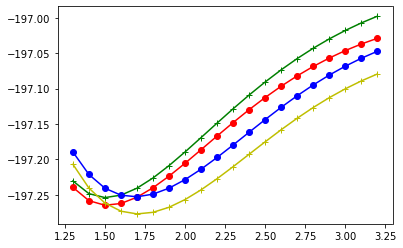

In [4]:
from matplotlib import pyplot as plt
gs = np.array(Psi4_g)
plt.plot(rs, g1, 'ro-')
plt.plot(rs, nodse_g1, 'g+-')
plt.plot(rs, e0, 'bo-')
plt.plot(rs, nodse_e0, 'y+-')
#plt.xlim(1.75,2.25)
plt.show()

\begin{align}
    \langle s | \langle \Phi_0 | \hat{H} | \Phi_0 \rangle | t \rangle &= 
    E_{RHF} + \sqrt{t} \left(\omega - i \frac{\gamma}{2} \right)\delta_{st} \\
    &+ \delta_{st}  \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ii}\mu^{\xi}_{jj} \\
    &- \frac{1}{2}\delta_{st} \sum_{\xi,\xi'} \sum_{i>j}^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} \mu^{\xi}_{ij}\mu^{\xi}_{ji} \\
    &+ \delta_{st} \frac{1}{2}\sum_{\xi,\xi'} \sum_i^{N_{occ}} \lambda^{\xi} \lambda^{\xi'} Q^{\xi \xi'}_{ii} \\
    &+ \delta_{st} \left(\lambda \cdot \mu_{nuc} - \lambda \cdot \langle \mu \rangle \right) \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii} \\
    &+ \delta_{st} d_c \\
    &+\sqrt{\frac{\omega}{2}} \lambda \cdot \langle \mu \rangle ( \delta_{s,t+1} + \delta_{s+1,t} ) \\
    &-\sqrt{\frac{\omega}{2}} \sum_{\xi} \sum_i^{N_{occ}} \lambda^{\xi} \mu^{\xi}_{ii}( \delta_{s,t+1} + \delta_{s+1,t} )
\end{align}

In [ ]:
NoDSE_g1 = np.copy(Our_g1)
NoDSE_e0 = np.copy(Our_e0)

In [ ]:
plt.plot(rs, NoDSE_g1, 'ro-')
plt.plot(rs, Our_g1, 'g+-')
plt.plot(rs, NoDSE_e0, 'bo-')
plt.plot(rs, Our_e0, 'y+-')
#plt.xlim(1.75,2.25)
plt.show()

In [ ]:


# elements corresponding to <s|<\Phi_i^a| H | \Phi_j^b|t>
for i in range(0, ndocc):
    for a in range(0, nvirt):
        for s in range(0,2):
            ias = 2*(i*nvirt + a) + s
            #print(ias)
            #print("i,a,s,ias:",i,a,s,ias)
            
            for j in range(0, ndocc):
                for b in range(0, nvirt):
                    for t in range(0,2):
                        jbt = 2*(j*nvirt + b) + t
                        #print(jbt)
                        #HCIS[ias, jbt] = 
                    

In [ ]:
# RHF Wavefunction dict from the original RHF wavefunction object 'wfn'
rhf_wfn_dict = psi4.core.Wavefunction.to_file(wfn)

# Uncomment if you want to compare the original RHF orbitals to the 
# CQED-RHF orbitals that are stored in the numpy array 'C'?
#print(np.isclose(rhf_wfn_dict['matrix']['Ca'], C))
#print(np.isclose(rhf_wfn_dict['matrix']['Cb'], C))


# Copy CQED-RHF orbitals to 'rhf_wfn_dict'
rhf_wfn_dict['matrix']['Ca'] -= C
rhf_wfn_dict['matrix']['Cb'] -= C

# Now create a new wavefunction object that has the CQED-RHF orbitals 'cqedrhf_wfn'
cqedrhf_wfn = psi4.core.Wavefunction.from_file(rhf_wfn_dict) 

# Confirm you have copied the CQED-RHF orbitals properly 
# by again getting a dic of the wavefunction and comparing
# the orbitals to the original numpy array 'C' that resulted
# from the CQED-RHF iterations
cqedrhf_wfn_dict = psi4.core.Wavefunction.to_file(cqedrhf_wfn)
print(cqedrhf_wfn_dict['matrix']['Ca'])
print(cqedrhf_wfn_dict['matrix']['Cb'])
#assert np.allclose(cqedrhf_wfn_dict['matrix']['Ca'], C, 1e-6)
#assert np.allclose(cqedrhf_wfn_dict['matrix']['Cb'], C, 1e-6)


In [ ]:
psi4.set_options({
    'CUBEPROP_TASKS': ['ORBITALS'],
    'CUBEPROP_ORBITALS': [1,2,3,4,5,6,7,8,9,10],
})
psi4.cubeprop(cqedrhf_wfn)

In [ ]:
# this will plot the cqed-rhf orbitals
import fortecubeview
fortecubeview.plot()

In [ ]:
# this will plot the original rhf orbitals
psi4.cubeprop(wfn)

In [ ]:
fortecubeview.plot()